<div class='bar_title'></div>

*Smart Cities and Geospatial Data Analysis*

# Assignment 3: Visualizing Spatial Data

Gunther Gust / Ignacio Ubeda<br>
Chair for Enterprise AI

Winter Semester 23/24

*Credits: Most of the material is taken from [Arribas-Bel, Geographic Data Science](https://darribas.org/gds_course/content/home.html#)*

In [ ]:
import os
import momepy
import osmnx as ox
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [2]:
ox.settings.overpass_settings='[out:json][timeout:90][date:"2020-09-07T00:00:00Z"]'

## Data preparation

### Polygons

We are going to use data from the Consumer Data Research Centre (CDRC) about Liverpool, in particular an extract from the Census.

In [3]:
filepath = os.path.join('data', 'Census_Residential_Data_Pack_2011', 'Local_Authority_Districts', 'E08000012', 'shapefiles', 'E08000012.shp')
liv = gpd.read_file(filepath)

In [4]:
print(type(liv))
print(liv.shape)
liv.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(298, 2)


,lsoa11cd,geometry
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38..."


### Lines

For a line layer, we are going to use a different bit of osmnx functionality that will allow us to extract all the highways:

```
The following cell requires internet connectivity.
```

In [5]:
bikepaths = ox.graph_from_place("Liverpool, UK", network_type="bike")

In [6]:
print(type(bikepaths))
print(len(bikepaths))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
23483


The `bikepaths` object is a graph, we can use the `nx_to_gdf()` function from `momepy` to extract the nodes and edges of the graph as `geopandas` objects. 

Don't worry if you don't understand how this is done, but look that now both nodes and edges are `geopandas` objects. 

In [ ]:
bikepaths_nodes, bikepaths_edges = momepy.nx_to_gdf(bikepaths, points=True, lines=True)

In [22]:
print(type(bikepaths_nodes))
print(bikepaths_nodes.shape)
bikepaths_nodes.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(23483, 7)


,y,x,street_count,nodeID,highway,ref,geometry
0,53.406506,-2.899986,3,0,NaN,NaN,POINT (-2.89999 53.40651)
1,53.407391,-2.902198,3,1,NaN,NaN,POINT (-2.90220 53.40739)
2,53.407790,-2.903047,3,2,NaN,NaN,POINT (-2.90305 53.40779)
3,53.407878,-2.902448,3,3,NaN,NaN,POINT (-2.90245 53.40788)
4,53.406920,-2.901002,3,4,NaN,NaN,POINT (-2.90100 53.40692)


In [21]:
print(type(bikepaths_edges))
print(bikepaths_edges.shape)
bikepaths_edges.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(56158, 18)


,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,geometry,junction,bridge,service,access,width,tunnel,node_start,node_end
0,4002276,True,3,A5080,Edge Lane Drive,trunk,40 mph,False,86.712,"LINESTRING (-2.89999 53.40651, -2.90048 53.406...",NaN,NaN,NaN,NaN,NaN,NaN,0,94
1,4002284,True,NaN,NaN,NaN,trunk_link,40 mph,False,60.297,"LINESTRING (-2.89999 53.40651, -2.90029 53.406...",NaN,NaN,NaN,NaN,NaN,NaN,0,90
2,546631489,True,3,A5080,Edge Lane Drive,trunk,30 mph,False,72.456,"LINESTRING (-2.90220 53.40739, -2.90252 53.407...",NaN,NaN,NaN,NaN,NaN,NaN,1,2
3,22791856,False,NaN,NaN,Broadgreen Road,residential,NaN,True,137.089,"LINESTRING (-2.90305 53.40779, -2.90300 53.407...",NaN,NaN,NaN,NaN,NaN,NaN,2,5176
4,546631489,True,3,A5080,Edge Lane Drive,trunk,30 mph,False,53.598,"LINESTRING (-2.90305 53.40779, -2.90343 53.407...",NaN,NaN,NaN,NaN,NaN,NaN,2,626


Note that now nodes are `POINT` and edges are `LINESTRING` geometries, for the following tasks we're only going to use the `bikepaths_edges` (lines) object.

### Points

For points, we will use the pubs of Liverpool, as recorded by OpenStreetMap. We can make a similar query to retrieve the table:

```
The following cell requires internet connectivity.
```

In [10]:
pubs = ox.features_from_place("Liverpool, UK", tags={"amenity": "bar"})

In [23]:
print(type(pubs))
print(pubs.shape)

pubs.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(77, 32)


amenity                name                   geometry  \
element_type osmid                                                              
node         27419484      bar          Blue Angel  POINT (-2.97629 53.40087)   
             27419489      bar        Alma de Cuba  POINT (-2.97898 53.40185)   
             101439393     bar  Revolution de Cuba  POINT (-2.99160 53.40085)   
             277072278     bar        The Merchant  POINT (-2.98040 53.40190)   
             308766469     bar      Masquerade Bar  POINT (-2.98725 53.40808)   

                       wheelchair  \
element_type osmid                  
node         27419484         NaN   
             27419489     limited   
             101439393        NaN   
             277072278        NaN   
             308766469        NaN   

                                                                website  gay  \
element_type osmid                                                             
node         27419484                                               NaN  NaN   
             27419489                                               NaN  NaN   
             101439393  https://www.revoluciondecuba.com/bar/liverpool/  NaN   
             277072278                                              NaN  NaN   
             308766469                                              NaN  yes   

                       addr:housenumber        addr:street  \
element_type osmid                                           
node         27419484               NaN                NaN   
             27419489               NaN                NaN   
             101439393              NaN                NaN   
             277072278              NaN                NaN   
             308766469               10  Cumberland Street   

                                                contact:facebook    lgbtq  \
element_type osmid                                                          
node         27419484                                        NaN      NaN   
             27419489                                        NaN      NaN   
             101439393                                       NaN      NaN   
             277072278                                       NaN      NaN   
             308766469  https://www.facebook.com/masquerade.bar/  primary   

                        ... opening_hours operator smoking sport  \
element_type osmid      ...                                        
node         27419484   ...           NaN      NaN     NaN   NaN   
             27419489   ...           NaN      NaN     NaN   NaN   
             101439393  ...           NaN      NaN     NaN   NaN   
             277072278  ...           NaN      NaN     NaN   NaN   
             308766469  ...           NaN      NaN     NaN   NaN   

                       toilets:wheelchair level outdoor_seating brewery nodes  \
element_type osmid                                                              
node         27419484                 NaN   NaN             NaN     NaN   NaN   
             27419489                 NaN   NaN             NaN     NaN   NaN   
             101439393                NaN   NaN             NaN     NaN   NaN   
             277072278                NaN   NaN             NaN     NaN   NaN   
             308766469                NaN   NaN             NaN     NaN   NaN   

                       building  
element_type osmid               
node         27419484       NaN  
             27419489       NaN  
             101439393      NaN  
             277072278      NaN  
             308766469      NaN  

[5 rows x 32 columns]

## Tasks

### Task I: *Tweak your map*

With those three layers, complete the following task:

- Make a multi-layer map of Liverpool that includes the following characteristics:
    - Features a title
    - Does not include axes frame
    - It has a figure size of 10 by 11
- For the neighborhoods (`liv`) layer:
    - Polygons are all in color `"#525252"` and 50% transparent
    - Boundary lines ("edges") have a width of 0.3 and are of color `"#B9EBE3"`
- For the bikepaths (`bikepaths_edges`) layer:
    - Lines ("edges") have a width of 0.8, 40% transparent, and are of color `"red"`
- For the pubs (`pubs`) layer:
    - Points are all in color `"blue"` and 0% transparent
- Includes a basemap with the [OpenStreetMap Mapnik theme](https://contextily.readthedocs.io/en/latest/providers_deepdive.html#Overview-of-built-in-providers)
    
**Hint 1:** Remember that we use `alpha` to set the transparency and its defined as `alpha = 1 - % transparency`

**Hint 2:** Don't forget to use the same coordindate reference system (CRS) for all layers, you may need to use the `to_crs()` method for changing CRS.

```
All of the requirements above are not equally hard to achieve. If you can get some but not all of them, that's also great! The point is you learn something every time you try.
```

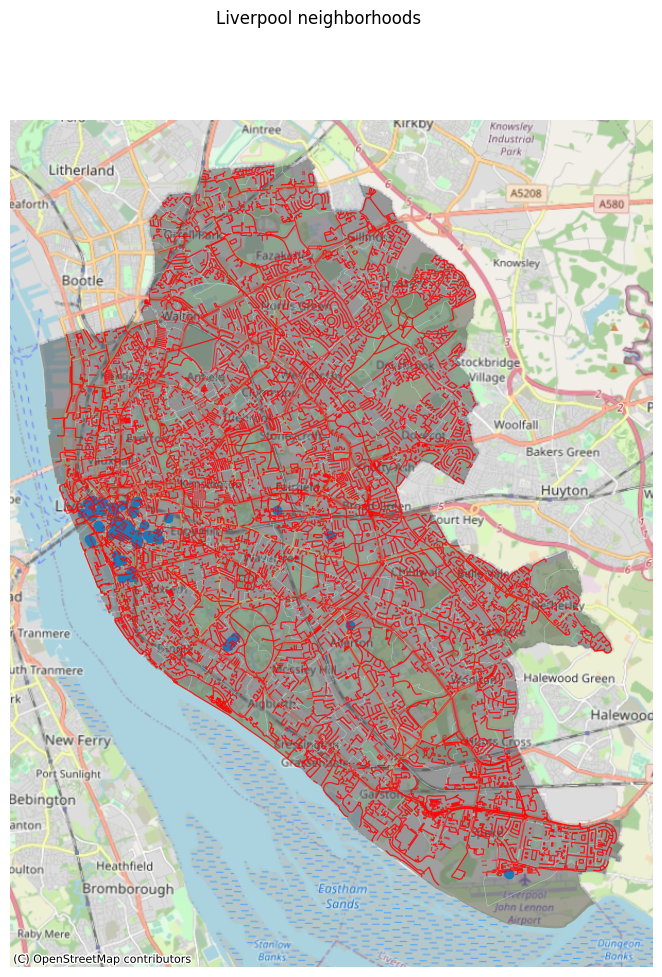

In [17]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(10, 11))

# Plot layer of neighborhoods on the axis
liv.plot(
    ax=ax,
    alpha=0.5, #set transparency
    facecolor='#525252', #set polygon color
    edgecolor='#B9EBE3', #set edge color
    linewidth=0.3 #set edge width
    )

# Plot layer of bikepath on the axis
bikepaths_edges.to_crs(liv.crs).plot(ax=ax, edgecolor='red', alpha=0.6, linewidth=0.8)

# Plot layer of pubs on the axis
pubs.to_crs(liv.crs).plot(ax=ax, facecolor='blue', alpha=1)

# Include basemap
cx.add_basemap(ax, 
                crs=liv.crs, 
                source=cx.providers.OpenStreetMap.Mapnik)

# Remove axis frames
ax.set_axis_off()

# Add figure title
f.suptitle("Liverpool neighborhoods")

# Display
plt.show()

### Task II: *Non-spatial manipulations*

For this one we will combine some of the ideas we learnt in the previous assignment with this one.

Focus on the LSOA `liv` layer and use it to do the following:

1. Calculate the area of each neighbourhood
1. Find the five smallest areas in the table. Create a new object (e.g. `smallest` with them only)
1. Create a multi-layer map of Liverpool with the map created in Task I (only using the `liv` layer and the basemap) and the five smallest areas coloured in `"red"`

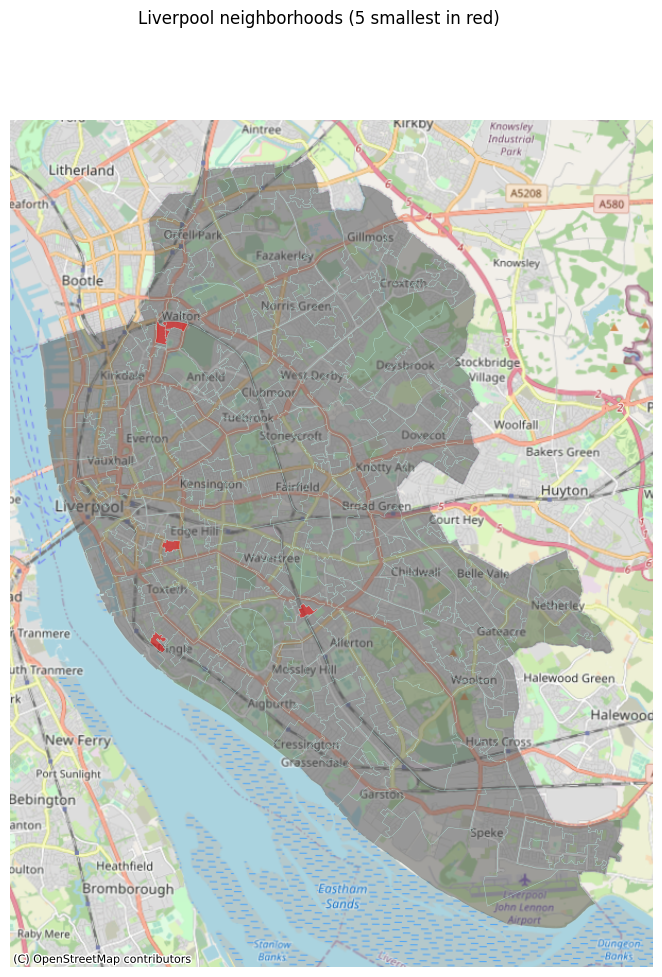

In [18]:
#1) calculate the area and save it in a new column
liv['area'] = liv.area

#2) create the smallest (geo)dataframe
#pick the first 5 rows sorted by 'area' in ascending order (i.e. the five smallest one)
smallest = liv.sort_values('area', ascending=True).head(5) 

#3) reuse the code from 'Task I' but now including the 'smallest' layer
f, ax = plt.subplots(1, figsize=(10, 11))
liv.plot(ax=ax, alpha=0.5, facecolor='#525252', edgecolor='#B9EBE3', linewidth=0.3)

#add 'smallest' layer
smallest.plot(ax=ax, alpha=0.5, facecolor='red', edgecolor='#B9EBE3', linewidth=0.3)

cx.add_basemap(ax, crs=liv.crs, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
f.suptitle("Liverpool neighborhoods (5 smallest in red)")
plt.show()

### Task III: *The gender gap on the streets*

This one is a bit more advanced, so don't despair if you can't get it on your first try. We're going to use a dataset containing streets from Zaragoza. 

Here're the questions for you to answer:

> *Which group accounts for longer total street length in Zaragoza: men or women? By how much*?

```

Here are some steps to guide you through the process:
(you can follow them or use a shortcut if you want)

1. You will need your spatial data projected, so they are expressed in metres, and the length calculation makes sense. Use EPSG:25830 as the target CRS.
2. Separate streets named after men from those named after women, perhaps in two objects (`men`, `women`) that contain the streets for each group. This is a non-spatial query at its heart.
3. Calculate the length of each street in each group. 
4. Create a total length by group by adding the lengths of each street. This is again a non-spatial operation (sum).
5. Compare the two and answer the questions. 
```

**Hint:** Don't worry about any cleaning step, assume that the dataset is already cleaned (i.e. you don't have to filter out anything)

In [19]:
filepath = os.path.join('data', 'zaragoza_streets.geojson')
streets = gpd.read_file(filepath)

print(type(streets))
print(streets.shape)
streets.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(10380, 8)


,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
0,Plaza Virgen de la Capilla,123483746,,Female,,-,-,"POLYGON ((-3.71472 40.48250, -3.71460 40.48229..."
1,Plaza Nuestra Señora del Prado,123483930,,Female,,-,-,"POLYGON ((-3.71404 40.48271, -3.71392 40.48249..."
2,Avenida del Cardenal Herrera Oria,4272448,,Male,,None,None,"LINESTRING (-3.71421 40.48307, -3.71407 40.483..."
3,Glorieta de Mariano Salvador Maella,4292687,,Male,,None,None,"LINESTRING (-3.71660 40.47909, -3.71665 40.479..."
4,Calle de Pedro Rico,4292689,,Male,,None,None,"LINESTRING (-3.70463 40.48167, -3.70441 40.481..."


In [20]:
#compute the length of streets
streets['length'] = streets.to_crs(epsg=25830).length

#compute the sum on length per gender (groupby)
total_length_by_gender = streets.groupby('gender').agg({'length':'sum'})

#extract the length for each category gender ('Female' and 'Male')
total_length_female = total_length_by_gender.loc[total_length_by_gender.index == 'Female', 'length'].values[0]
total_length_male = total_length_by_gender.loc[total_length_by_gender.index == 'Male', 'length'].values[0]

#Print results
print(f"Total length for Female: {round(total_length_female, 2)}")
print(f"Total length for Male: {round(total_length_male, 2)}")
print(f"Difference (Female - Male): {round(total_length_female - total_length_male, 2)}")

Total length for Female: 290232.98
Total length for Male: 1198106.24
Difference (Female - Male): -907873.26
